# İçerik
1. K - Means Algoritması Nedir?
2. K - Means Algoritması Nasıl Çalışır?
3. K - Means Algoritması örneği
4. K   Değeri nasıl seçilir?
5. K - Means Python Kodu

# 1. K - Means Algoritması Nedir?

K - Means algoritması, veriyi girlen k değeri kümeye ayırır

# 2. K - Means Algoritması Nasıl Çalışır

1. K değeri Seçilir. Örneğin K = 2

2. K değeri kadar random centroid çizilir.

3. Veri noktalarının centroide göre uzaklığını(eucledian distance) hesaplanır ve gruplama yapılır.

4. Centroide ait noktaların ortlaması alınır. Centroid ortalama yerine çizilir ve tekrar mesafeye göre gruplama yapılır

5. Centroid yeri değişmeyene kadar 4. adım tekrarlanır.

# 3. K - Means Algirotması Örneği

Elimizde resimde görüldüğü gibi bir veri olduğunu varsayalım. K değerimiz de 2 olsun

![](Foto0.png)

K değeri kadar rastgele centroid çizelim

![](Foto1.png)

Eucledian mesafe hesaplamasına göre veri noktalarının centroide göre uzaklığını hesaplayıp gruplama yapalım.

(Kırmızı renge boyananlar kırmızı centroid grubuna, Mavi renge boyananlar mavi centroid grubuna dahil edilmiştir)

Not: Mesafeler rastgele göz kararı belirlenmiştir

![](Foto2.png)

Verimizin nasıl ayrıldığını görelim

![](Foto3.png)

Bu noktaların ortalaması alınır ve centroid yeni ortalama yerine çizilir.

Rastgele kafamızda göz kararı ortalamasını alıp çizelim

![](Foto4.png)

Görüldüğü gibi centroidler kendi gurubuna ait noktalar ağırlıklı olarak neredeyse oraya doğru kaydı.

Şimdi işlemleri tekrarlayalım ve noktaların centroide olan uzaklığını hesaplayıp gruplama yapalım

![](Foto5.png)

Verimizin nasıl ayrıldığını görelim

![](Foto6.png)

Ortalamalarını alıp yeni centroideri çizelim

![](Foto7.png)

Şekilde görüldüğü gibi centroidler artık kendi gruplarının tam merkezinde bulunmaktadır. işlemleri tekrarlayalım ve veri noktalarının centroide göre uzaklığını hesaplayıp tekrar kümeleme yapalım. Çünkü centroidlerin yeri değişmeyene kadar işlem devam edilmelidir

![](Foto8.png)

ortalamasını alıp centroidleri çizdğimizde yerinin değişmediğini görürüz. Yani artık verimiz K=2 değeri kadar kümeye ayrılmıştır

![](Foto9.png)

# 4. K Değeri Nasıl Seçilir?

En iyi k değerini bulmak için wcss = within cluster sum of squares hesaplanır. Yani her clusterin içindeki veri noktalarının cluster merkezine olan uzaklığının karesinin toplamı hesaplanır. Bu değeri hesaplayıp grafiğini çizdiğimizde elbow(dirsek) olan yer bizim optimum k değerimizdir. Yani bir insan kolu gibi düşündüğümüzde dirsek kısmı en iyi değerdir örnekle görelim

![](Foto10.png)

burada görüldüğü gibi elbow kısmı 3'tür. Biz de kodumuzda wcss hesaplayıp grafiğini çizeriz daha sonra da grafikten elbow kısmının değerini k değerimiz yaparız

# 5. K - Means Algoritması Python Kodu

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Bir veri seti oluşturalım

In [9]:
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

x2 = np.random.normal(60,5,1000)
y2 = np.random.normal(60,5,1000)

x3 = np.random.normal(60,5,1000)
y3 = np.random.normal(15,5,1000)

x ve y değerleri bir araya getirelim

In [12]:
x = np.concatenate((x1,x2,x3),axis = 0)
y = np.concatenate((y1,y2,y3),axis = 0)

In [13]:
dictionary = {"x":x,"y":y}

Bir araya getirdiğimiz x ve y değerleriyle veri oluşturalım

In [16]:
data = pd.DataFrame(dictionary)

In [18]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


,x,y
0,22.831880,35.855864
1,22.632261,28.985827
2,22.022078,21.629831
3,27.761601,36.164995
4,30.149074,28.559210


Veri noktalarımızı görelim

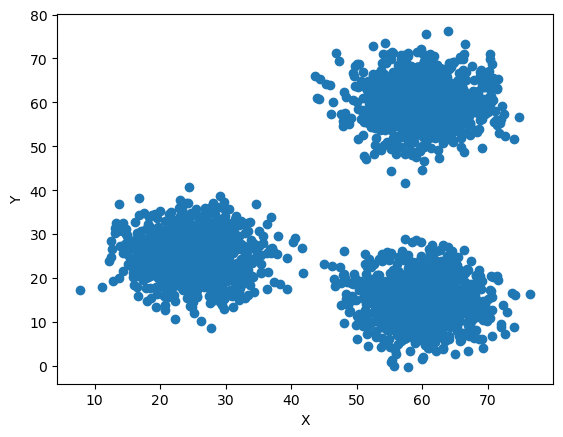

In [28]:
plt.scatter(data.x,data.y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Şimdi k değerini nasıl seçeceğimizi kodla görelim

In [24]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

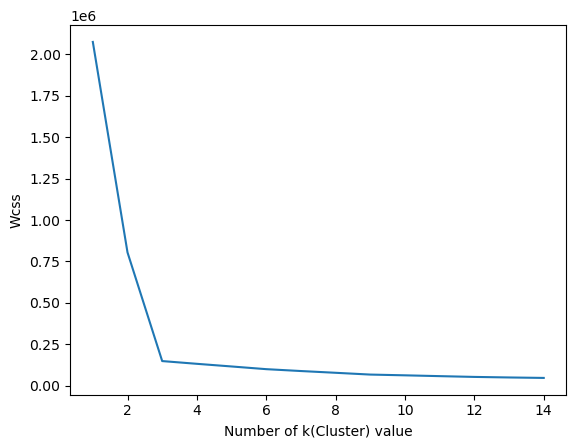

In [38]:
plt.plot(range(1,15),wcss)
plt.xlabel("Number of k(Cluster) value")
plt.ylabel("Wcss")
plt.show()

Şekilde görüldüğü gibi elbow olan yerin değeri 3'tür. Yani optimum cluster sayımız 3'tür. K değerimizi 3 seçebiliriz

Modelimizi geliştirelim

In [32]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data)
data["label"] = clusters

In [35]:
data.sample(5)

,x,y,label
770,24.630060,19.962866,2
1471,55.108265,70.571363,1
1301,50.127319,51.639250,1
2339,67.274413,9.911906,0
1801,60.938190,59.145796,1


Şimdi clusterlarımızı şekil üzerinde görelim

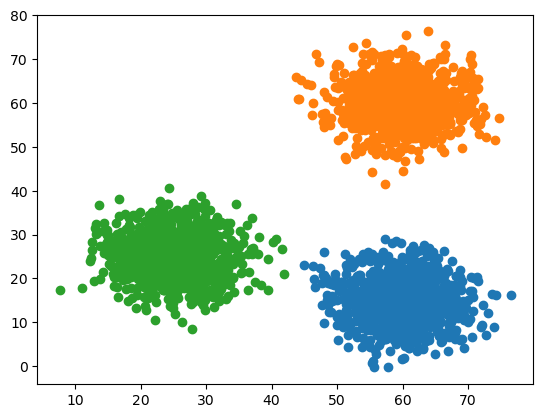

In [37]:
plt.scatter(data.x[data.label == 0],data.y[data.label == 0])
plt.scatter(data.x[data.label == 1],data.y[data.label == 1])
plt.scatter(data.x[data.label == 2],data.y[data.label == 2])
plt.show()

# 6. Sonuç

Sonuç olarak verimizi 3 label'a ayırmış olduk